ref
rank approx error: https://www.youtube.com/watch?v=c7e-D2tmRE0
em algo: http://www.cs.cmu.edu/~aarti/Class/10701_Spring14/slides/EM_annotatedonclass.pdf, https://www.youtube.com/watch?v=iQoXFmbXRJA
svd: https://www.cse.unr.edu/~bebis/CS791E/Notes/SVD.pdf
pca: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c, https://builtin.com/data-science/step-step-explanation-principal-component-analysis

1(a) + (b)

In [966]:
%matplotlib inline

In [967]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm

/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


(540, 2500) (540,)
data at row 10: [107. 141. 153. ...  49.  40.  31.]


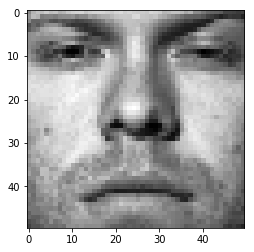

In [968]:
train_labels = []
train_data = []

for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    temp_im = im.reshape(2500,)
    train_data.append(temp_im)
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
print('data at row 10:', train_data[10, :])
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)
data at row 90: [56. 70. 70. ... 12. 13. 11.]


/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


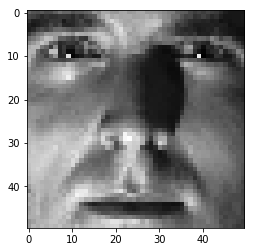

In [969]:
test_labels = []
test_data = []

for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    temp_im = im.reshape(2500,)
    test_data.append(temp_im)
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)
print('data at row 90:', test_data[10, :])
plt.imshow(test_data[90, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

1(c)

In [970]:
sum_cols = np.sum(train_data, axis=0)
avg_col = sum_cols / 540

In [971]:
avg_col

array([59.25185185, 56.10185185, 52.42222222, ..., 67.22222222,
       64.61851852, 59.27592593])

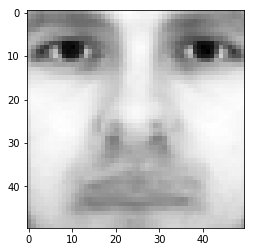

In [972]:
plt.imshow(avg_col.reshape(50,50), cmap = cm.Greys_r)
plt.show()

1(d)

In [973]:
train_data = train_data - avg_col
test_data = test_data - avg_col

data at row 10: [ 47.74814815  84.89814815 100.57777778 ... -18.22222222 -24.61851852
 -28.27592593]


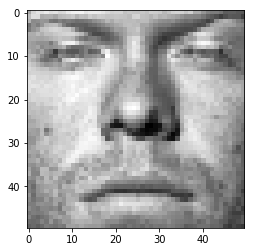

In [974]:
print('data at row 10:', train_data[10, :])
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

data at row 90: [ 19.74814815   8.89814815   9.57777778 ... -15.22222222 -19.61851852
 -11.27592593]


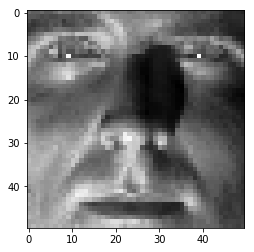

In [975]:
print('data at row 90:', test_data[90, :])
plt.imshow(test_data[90, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

1(e)

In [986]:
u, s, vt = np.linalg.svd(train_data)

In [987]:
u.shape, np.diag(s).shape, vt.shape

((540, 540), (540, 540), (2500, 2500))

image at index 0


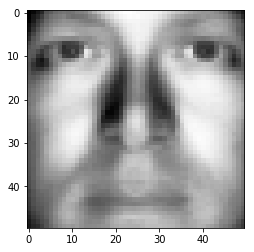

image at index 1


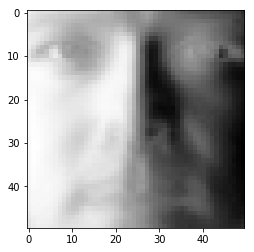

image at index 2


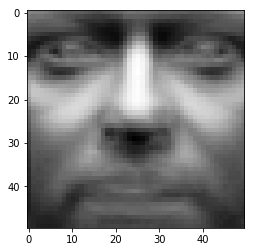

image at index 3


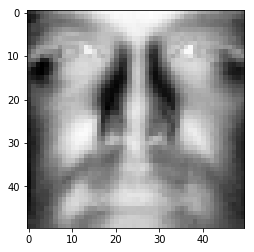

image at index 4


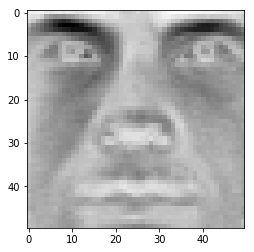

image at index 5


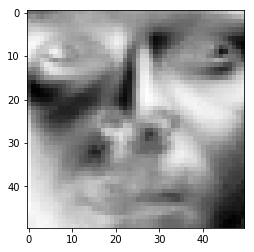

image at index 6


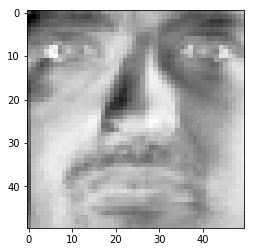

image at index 7


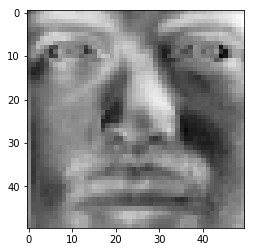

image at index 8


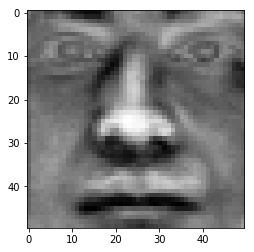

image at index 9


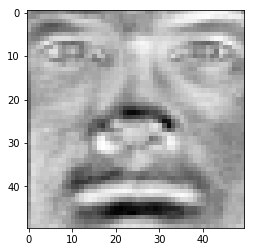

In [988]:
for i in range(0, 10):
    print('image at index', i)
    plt.imshow(vt[i, :].reshape(50,50), cmap = cm.Greys_r)
    filename = 'face' + str(i) + '.png'
    plt.savefig(filename)
    plt.show()

1(f)

In [112]:
#convert s into diagonal matrix (based on numpy documentation)
s = np.diag(s)

In [114]:
#calculating the approximation error
from numpy.linalg import norm

errors = []

for r in range(1, 201):
    x_estimated = u[:, :r] @ s[:r, :r] @ vt[:r, :]        ##matrix multiplication
    diff = train_data - x_estimated
    diff_norm = norm(diff, 'fro')
    errors.append(diff_norm)

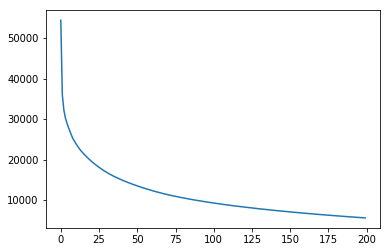

In [115]:
plt.plot(errors)
plt.show()

1(g)

In [99]:
#function for getting the r-dimensional feature matrix
def get_eigen_features(X, vt, r):
    vt_r = vt[:r, :]
    vt_r_t = vt_r.transpose()
    F = X @ vt_r_t
    return F

1(h)(1)

In [116]:
X_train_transformed = get_eigen_features(train_data, vt, r=10)
X_test_transformed = get_eigen_features(test_data, vt, r=10)

In [117]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='ovr').fit(X_train_transformed, train_labels)
predictions = logreg.predict(X_test_transformed)

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, predictions))

0.79


1(h)(2)

In [ ]:
import warnings

warnings.filterwarnings('ignore')        ##suppress warnings

In [106]:
accuracy = []

for r in range(1, 201):
    X_train_transformed = get_eigen_features(train_data, vt, r=r)
    X_test_transformed = get_eigen_features(test_data, vt, r=r)
    
    logreg = LogisticRegression(multi_class='ovr').fit(X_train_transformed, train_labels)
    predictions = logreg.predict(X_test_transformed)
    
    accuracy.append(accuracy_score(test_labels, predictions))

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed t

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


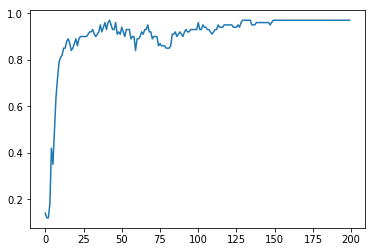

In [107]:
plt.plot(accuracy)
plt.show()

2(a)

In [355]:
text_data = np.load('science/science2k-doc-word.npy')

In [356]:
from sklearn.cluster import KMeans

labels = []
cluster_centers = []

for k in range(5, 21):
    print('processing kmeans where k =', k)
    kmeans = KMeans(n_clusters=k, n_jobs=-1).fit(text_data)
    labels.append(kmeans.labels_)
    cluster_centers.append(kmeans.cluster_centers_)

processing kmeans where k = 5
processing kmeans where k = 6
processing kmeans where k = 7
processing kmeans where k = 8
processing kmeans where k = 9
processing kmeans where k = 10
processing kmeans where k = 11
processing kmeans where k = 12
processing kmeans where k = 13
processing kmeans where k = 14
processing kmeans where k = 15
processing kmeans where k = 16
processing kmeans where k = 17
processing kmeans where k = 18
processing kmeans where k = 19
processing kmeans where k = 20


In [362]:
chosen_k = 13
print('selected k value:', chosen_k)

selected k value: 13


In [363]:
#get the labels for each datapoint & center for each cluster (given k=13)
idx = chosen_k - 5
labels_selected = labels[idx]
centers_selected = cluster_centers[idx]

In [364]:
#get the datapoints for each cluster
documents_by_cluster = []
documents_idx_by_cluster = []

for i in range(0, 13):
    documents = []
    documents_idx = []
    for index, label in enumerate(labels_selected):
        if label == i:
            documents.append(text_data[index])
            documents_idx.append(index)
    
    documents_by_cluster.append(documents)
    documents_idx_by_cluster.append(documents_idx)

In [365]:
#compute the average value for each column
avg_words_mean = np.mean(text_data, axis=0)

In [366]:
words = []
words_file = open('science/science2k-vocab.txt', 'r')

for line in words_file:
    words.append(line.strip('\n'))
    
words_file.close()

In [368]:
#get the top 10 words for each cluster
top_words_by_cluster = []

for i in range(0, 13):
    current_cluster_words = []
    current_cluster_docs = documents_by_cluster[i]
    
    diff = centers_selected[i] - avg_words_mean
    words_idx = np.flip(np.argsort(diff))
    top_words_idx = words_idx[:10]
    for idx in top_words_idx:
        current_cluster_words.append(words[idx])
    
    top_words_by_cluster.append(current_cluster_words)

In [369]:
for idx, words in enumerate(top_words_by_cluster):
    print('cluster #', idx, 'has the following top 10 words:', words)
    print()

cluster # 0 has the following top 10 words: ['residues', 'crystal', 'binding', 'conserved', 'side', 'helix', 'loop', 'domain', 'chains', 'residue']

cluster # 1 has the following top 10 words: ['mail', 'compass', 'sciences', 'author', 'issue', 'news', 'page', 'scientific', 'article', 'policy']

cluster # 2 has the following top 10 words: ['material', 'solar', 'earth', 'resolution', 'observations', 'distribution', 'estimate', 'scale', 'mass', 'planetary']

cluster # 3 has the following top 10 words: ['reports', 'fig', 'values', 'temperature', 'solution', 'shows', 'composition', 'table', 'lower', 'magnetic']

cluster # 4 has the following top 10 words: ['says', 'researchers', 'scientists', 'year', 'get', 'just', 'people', 'last', 'years', 'say']

cluster # 5 has the following top 10 words: ['ocean', 'global', 'variations', 'sea', 'climate', 'atmospheric', 'temperature', 'period', 'surface', 'changes']

cluster # 6 has the following top 10 words: ['protein', 'gene', 'genes', 'dna', 'prote

In [370]:
titles = []
titles_file = open('science/science2k-titles.txt', 'r')

for line in titles_file:
    titles.append(line.strip('\n'))
    
titles_file.close()

In [371]:
top_titles_by_cluster = []

for i in range(0, 13):
    current_cluster_titles = []
    current_cluster_docs = zip(documents_by_cluster[i], documents_idx_by_cluster[i])
    current_cluster_docs = list(current_cluster_docs)
    current_cluster_center = centers_selected[i]
    
    distances = []
    for doc in current_cluster_docs:
        dist = norm(doc[0] - current_cluster_center)
        distances.append((dist, doc[1]))
    
    sorted_dist = sorted(distances, key=lambda x:x[0])
    top_titles_index = sorted_dist
    if (len(current_cluster_docs) > 10):
        top_titles_index = sorted_dist[:10]
        
    for item in top_titles_index:
        idx = item[1]
        current_cluster_titles.append(titles[idx])
    
    top_titles_by_cluster.append(current_cluster_titles)

In [372]:
for idx, titles in enumerate(top_titles_by_cluster):
    print('cluster #', idx, 'has the following top', len(titles), 'titles:')
    for title in titles:
        print(title)
    print()

cluster # 0 has the following top 10 titles:
"Structure of Yeast Poly(A) Polymerase Alone and in Complex with 3'-dATP"
"Structure of Murine CTLA-4 and Its Role in Modulating T Cell Responsiveness"
"Structure of the S15,S6,S18-rRNA Complex: Assembly of the 30S Ribosome Central Domain"
"Atomic Structure of PDE4: Insights into Phosphodiesterase Mechanism and Specificity"
"Twists in Catalysis: Alternating Conformations of Escherichia coli Thioredoxin Reductase"
"The Productive Conformation of Arachidonic Acid Bound to Prostaglandin Synthase"
"Redox Signaling in Chloroplasts: Cleavage of Disulfides by an Iron-Sulfur Cluster"
"Convergent Solutions to Binding at a Protein-Protein Interface"
"Structural Basis of Smad2 Recognition by the Smad Anchor for Receptor Activation"
"Structure of the Protease Domain of Memapsin 2 (b-Secretase) Complexed with Inhibitor"

cluster # 1 has the following top 10 titles:
"Algorithmic Gladiators Vie for Digital Glory"
"Reopening the Darkest Chapter in German Sc

2(b)

In [373]:
word_data = np.load('science/science2k-word-doc.npy')

In [374]:
labels = []
cluster_centers = []

for k in range(5, 21):
    print('processing kmeans where k =', k)
    kmeans = KMeans(n_clusters=k, n_jobs=-1).fit(word_data)
    labels.append(kmeans.labels_)
    cluster_centers.append(kmeans.cluster_centers_)

processing kmeans where k = 5
processing kmeans where k = 6
processing kmeans where k = 7
processing kmeans where k = 8
processing kmeans where k = 9
processing kmeans where k = 10
processing kmeans where k = 11
processing kmeans where k = 12
processing kmeans where k = 13
processing kmeans where k = 14
processing kmeans where k = 15
processing kmeans where k = 16
processing kmeans where k = 17
processing kmeans where k = 18
processing kmeans where k = 19
processing kmeans where k = 20


In [375]:
chosen_k = 11
print('selected k value:', chosen_k)
idx = chosen_k - 5
labels_selected = labels[idx]
centers_selected = cluster_centers[idx]

selected k value: 11


In [376]:
words_by_cluster = []
words_idx_by_cluster = []

for i in range(0, 11):
    words = []
    words_idx = []
    for index, label in enumerate(labels_selected):
        if label == i:
            words.append(word_data[index])
            words_idx.append(index)
    
    words_by_cluster.append(words)
    words_idx_by_cluster.append(words_idx)

In [377]:
avg_titles_mean = np.mean(word_data, axis=0)

In [378]:
titles = []
titles_file = open('science/science2k-titles.txt', 'r')

for line in titles_file:
    titles.append(line.strip('\n'))
    
titles_file.close()

In [379]:
top_titles_by_cluster = []

for i in range(0, 11):
    current_cluster_titles = []
    current_cluster_words = words_by_cluster[i]
    
    #cluster_mean = np.mean(current_cluster_words, axis=0)
    diff = centers_selected[i] - avg_titles_mean
    
    titles_idx = np.flip(np.argsort(diff))
    top_titles_idx = titles_idx[:10]
    for idx in top_titles_idx:
        current_cluster_titles.append(titles[idx])
    
    top_titles_by_cluster.append(current_cluster_titles)

In [380]:
for idx, titles in enumerate(top_titles_by_cluster):
    print('cluster #', idx, 'has the following top 10 titles:')
    for title in titles:
        print(title)
    print()

cluster # 0 has the following top 10 titles:
"A Mouse Chronology"
"Meltdown on Long Island"
"Atom-Scale Research Gets Real"
"Presidential Forum: Gore and Bush Offer Their Views on Science"
"Help Needed to Rebuild Science in Yugoslavia"
"I'd like to See America Used as a Global Lab"
"Soft Money's Hard Realities"
"Silent No Longer: 'Model Minority' Mobilizes"
"Ecologists on a Mission to Save the World"
"Clones: A Hard Act to Follow"

cluster # 1 has the following top 10 titles:
"NEAR at Eros: Imaging and Spectral Results"
"Reduction of Tropical Cloudiness by Soot"
"Internal Structure and Early Thermal Evolution of Mars from Mars Global Surveyor Topography and Gravity"
"The Atom-Cavity Microscope: Single Atoms Bound in Orbit by Single Photons"
"Climate Extremes: Observations, Modeling, and Impacts"
"Calcium Sensitivity of Glutamate Release in a Calyx-Type Terminal"
"Experiments and Simulations of Ion-Enhanced Interfacial Chemistry on Aqueous NaCl Aerosols"
"Sediments at the Top of Earth's

In [381]:
words = []
words_file = open('science/science2k-vocab.txt', 'r')

for line in words_file:
    words.append(line.strip('\n'))
    
words_file.close()

In [382]:
top_words_by_cluster = []

for i in range(0, 11):
    current_cluster_words = []
    current_cluster_words_all = zip(words_by_cluster[i], words_idx_by_cluster[i])
    current_cluster_words_all = list(current_cluster_words_all)
    current_cluster_center = centers_selected[i]
    
    distances = []
    for w in current_cluster_words_all:
        dist = norm(w[0] - current_cluster_center)
        distances.append((dist, w[1]))
    
    sorted_dist = sorted(distances, key=lambda x:x[0])
    top_words_index = sorted_dist
    if (len(current_cluster_words_all) > 10):
        top_words_index = sorted_dist[:10]
        
    for item in top_words_index:
        idx = item[1]
        current_cluster_words.append(words[idx])
    
    top_words_by_cluster.append(current_cluster_words)

In [383]:
for idx, words in enumerate(top_words_by_cluster):
    print('cluster #', idx, 'has the following top', len(words), 'words:', words)
    print()

cluster # 0 has the following top 10 words: ['recalls', 'clinton', 'geneticist', 'security', 'fight', 'prize', 'spending', 'campaign', 'hes', 'rights']

cluster # 1 has the following top 10 words: ['start', 'decrease', 'error', 'magnitude', 'peak', 'maximum', 'fraction', 'constant', 'comparison', 'measurements']

cluster # 2 has the following top 10 words: ['aptamers', 'lcts', 'dnag', 'doxy', 'proteorhodopsin', 'trxr', 'lg268', 'neas', 'rory', 'nompc']

cluster # 3 has the following top 10 words: ['groove', 'ribbon', 'conformations', 'pocket', 'refinement', 'refined', 'helices', 'disordered', 'helical', 'reflections']

cluster # 4 has the following top 10 words: ['excitations', 'insulating', 'spins', 'resonant', 'coherence', 'fermi', 'anisotropic', 'doped', 'anisotropy', 'semiconductor']

cluster # 5 has the following top 10 words: ['polymerase', 'amino', 'mutation', 'conserved', 'acids', 'mutations', 'transcription', 'mutant', 'vitro', 'terminal']

cluster # 6 has the following top 10

3(a) -> see pdf file

3(b)

In [416]:
file = open('faithful/faithful.dat', 'r')
file_arr = []

for line in file:
    file_arr.append(line.strip('\n'))

file.close()

In [417]:
temp_data = file_arr[26:]
faithful_data = []
for row in temp_data:
    temp_row = row.split()
    faithful_data.append([float(temp_row[1]), float(temp_row[2])])

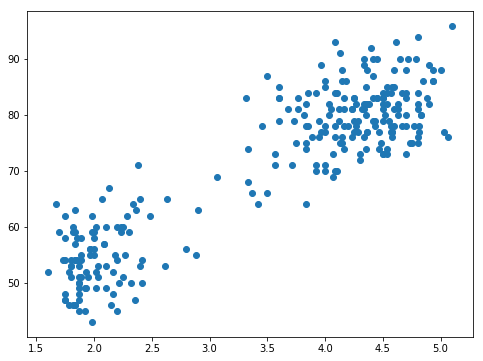

In [418]:
faithful_data = np.asarray(faithful_data)
plt.figure(figsize=(8,6))
plt.scatter(faithful_data[:,0], faithful_data[:,1])
plt.show()

3(c)

In [719]:
from scipy.stats import norm

#function for getting the probability of one point belonging to one cluster
def get_probability(values, mean, var, prior):
    prob = prior
    for idx, value in enumerate(values):
        prob *= norm.pdf(value, mean[idx], var[idx][idx])
    return prob

In [715]:
def e_step(data, mean, var, prior):
    processed_data = np.copy(data)
    for point in processed_data:
        prob_0 = get_probability([point[0], point[1]], mean[0], var[0], prior[0])
        prob_1 = get_probability([point[0], point[1]], mean[1], var[1], prior[1])
        
        if prob_0 < prob_1:
            point[2] = 1
        else:
            point[2] = 0
        
    return processed_data

In [716]:
def m_step(data):
    new_mean = []
    new_var = []
    new_prior = []
    
    cluster_0_points = []
    cluster_1_points = []
    for point in data:
        if point[2] == 0:
            cluster_0_points.append(point)
        else:
            cluster_1_points.append(point)
    
    prior_0 = len(cluster_0_points) / len(data)
    prior_1 = len(cluster_1_points) / len(data)
    new_prior = [prior_0, prior_1]
    #print(new_prior)
    
    cluster_0_points = np.asarray(cluster_0_points)
    cluster_1_points = np.asarray(cluster_1_points)
    
    mean_0_x = cluster_0_points[:,0].mean()
    mean_0_y = cluster_0_points[:,1].mean()
    mean_1_x = cluster_1_points[:,0].mean()
    mean_1_y = cluster_1_points[:,1].mean()
    new_mean = [[mean_0_x, mean_0_y], [mean_1_x, mean_1_y]]
    #print(new_mean)
    
    var_0 = [[cluster_0_points[:,0].std(), 0], [0, cluster_0_points[:,1].std()]]
    if var_0[0][0] == 0:
        var_0 = [[1,0],[0,1]]
    var_1 = [[cluster_1_points[:,0].std(), 0], [0, cluster_1_points[:,1].std()]]
    if var_1[0][0] == 0:
        var_1 = [[1,0],[0,1]]
    new_var = [var_0, var_1]
    #print(new_var)
    
    return new_mean, new_var, new_prior

In [674]:
def em_gmm(data, mean, var, prior):
    end = False
    i = 0
    means = []
    
    while (not end) and (i < 50):
        means.append(np.asarray(mean))
        clustered_data = e_step(data, mean, var, prior)
        new_mean, new_var, new_prior = m_step(clustered_data)
        
        diff = np.absolute((np.asarray(new_mean) - np.asarray(mean)).sum())
        if diff < 0.001:        ##convergence condition
            end = True
            break
        
        data = clustered_data
        mean = new_mean
        var = new_var
        prior = new_prior
        
        ##optional: plot points & assigned labels for each iteration
        
        #print('iteration', i+1)
        #plt.scatter(data[:,0], data[:,1], c=data[:,2])
        #plt.show()
        i += 1
        
    return i, means

In [694]:
#adding a target column to the dataset & initialize it to -1
target_col = [-1] * len(faithful_data)
target_col = np.reshape(target_col, (-1, 1))
faithful_data_new = np.concatenate((faithful_data, target_col), axis=1)

iteration 1


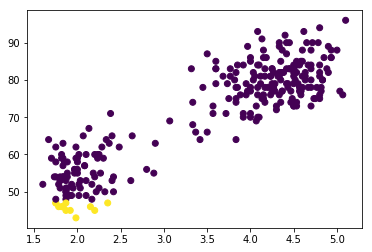

iteration 2


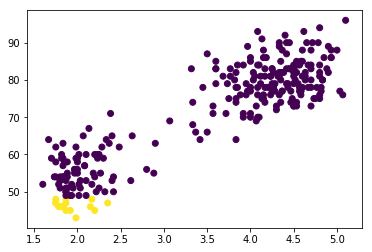

iteration 3


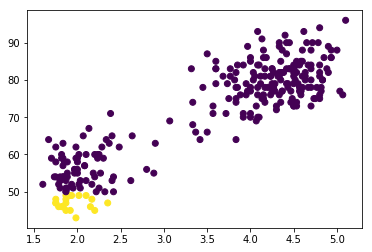

iteration 4


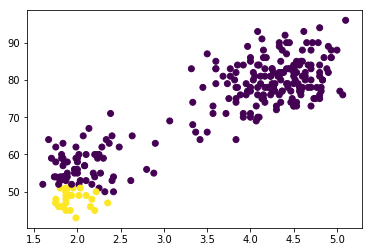

iteration 5


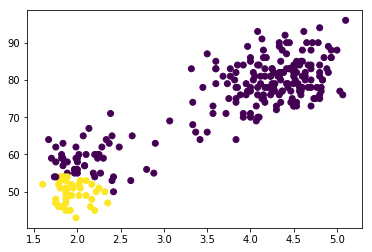

iteration 6


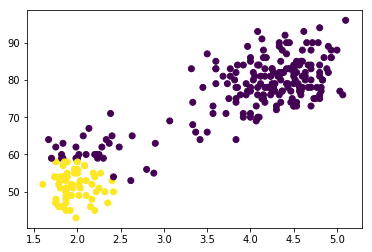

iteration 7


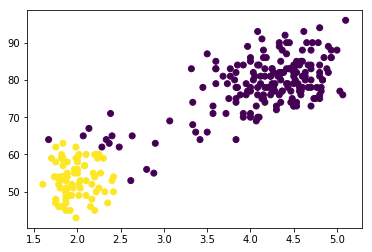

iteration 8


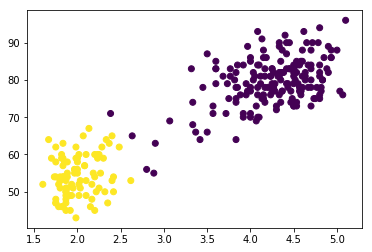

iteration 9


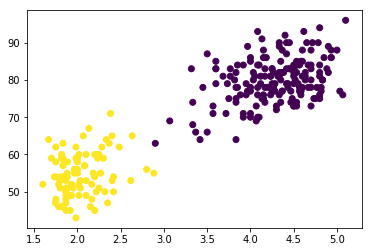

iteration 10


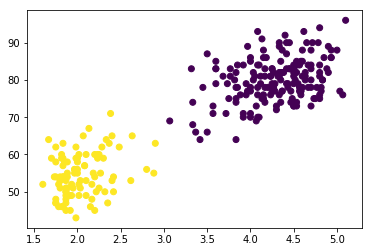

/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


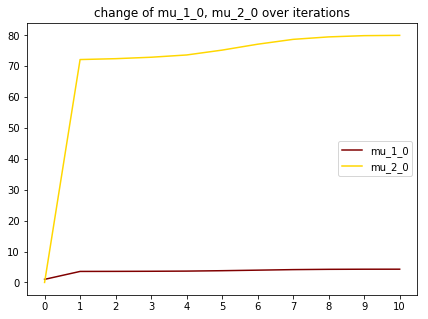

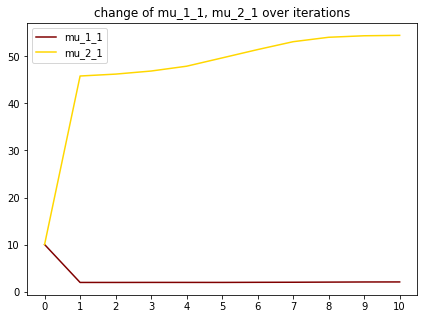

In [582]:
#intentionally picked a bad initial value for mean and prior
init_mean = np.asarray([[1,0],[10,10]])
init_var = np.asarray([[[1,0], [0,1]], [[1,0], [0,1]]])
init_prior = np.asarray([0.15, 0.85])

iterations, means = em_gmm(faithful_data_new, init_mean, init_var, init_prior)

iter_list = [i for i in range(iterations+1)]
mean_x_0 = []
mean_y_0 = []
mean_x_1 = []
mean_y_1 = []
for mean in means:
    mean_x_0.append(mean[0][0])
    mean_y_0.append(mean[0][1])
    mean_x_1.append(mean[1][0])
    mean_y_1.append(mean[1][1])

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(mean_x_0, c='maroon', label='mu_1_0')
ax.plot(mean_y_0, c='gold', label='mu_2_0')
plt.xticks(iter_list)
plt.legend()
plt.title('change of mu_1_0, mu_2_0 over iterations')
fig.show()

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(mean_x_1, c='maroon', label='mu_1_1')
ax.plot(mean_y_1, c='gold', label='mu_2_1')
plt.xticks(iter_list)
plt.title('change of mu_1_1, mu_2_1 over iterations')
plt.legend()
fig.show()
#print(iterations)
#print(means)

In [731]:
random_means = []
random_vars = []
random_priors = []

for i in range(0, 50):
    mean_0_x = 4 * np.random.random_sample() + 1
    mean_0_y = 30 * np.random.random_sample() + 40
    mean_1_x = 4 * np.random.random_sample() + 1
    mean_1_y = 30 * np.random.random_sample() + 70
    random_means.append([[mean_0_x, mean_0_y], [mean_1_x, mean_1_y]])
    
    prior_0 = np.random.random_sample()
    prior_1 = 1 - prior_0
    random_priors.append([prior_0, prior_1])

In [734]:
count_iterations = []
for i in range(0, 50):
    init_mean = random_means[i]
    init_prior = random_priors[i]
    init_var = np.asarray([[[1,0], [0,1]], [[1,0], [0,1]]])
    print('running times counter:', i)
    iterations, means = em_gmm(faithful_data_new, init_mean, init_var, init_prior)
    count_iterations.append(iterations)

running times counter: 0
running times counter: 1
running times counter: 2
running times counter: 3
running times counter: 4
running times counter: 5
running times counter: 6
running times counter: 7
running times counter: 8
running times counter: 9
running times counter: 10
running times counter: 11
running times counter: 12
running times counter: 13
running times counter: 14
running times counter: 15
running times counter: 16
running times counter: 17
running times counter: 18
running times counter: 19
running times counter: 20
running times counter: 21
running times counter: 22
running times counter: 23
running times counter: 24
running times counter: 25
running times counter: 26
running times counter: 27
running times counter: 28
running times counter: 29
running times counter: 30
running times counter: 31
running times counter: 32
running times counter: 33
running times counter: 34
running times counter: 35
running times counter: 36
running times counter: 37
running times counter:

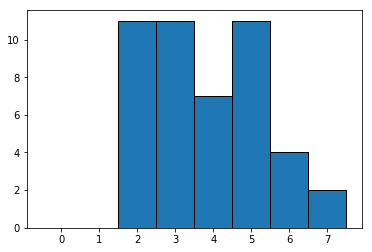

In [735]:
plt.hist(count_iterations, bins=np.arange(9)-0.5, edgecolor='black')
plt.show()

In [991]:
np.asarray(count_iterations).mean()

4.18

3(d)

In [737]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(faithful_data)

In [741]:
target_col = np.reshape(kmeans.labels_, (-1, 1))
faithful_data_kmeans = np.concatenate((faithful_data, target_col), axis=1)

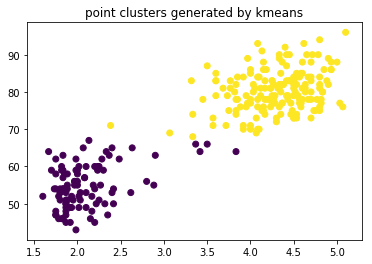

In [755]:
plt.scatter(faithful_data_kmeans[:,0], faithful_data_kmeans[:,1], c=faithful_data_kmeans[:,2])
plt.title('point clusters generated by kmeans')
plt.show()

In [744]:
init_mean, init_var, init_prior = m_step(faithful_data_kmeans)

/Users/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


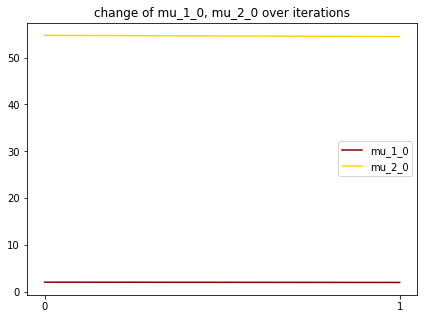

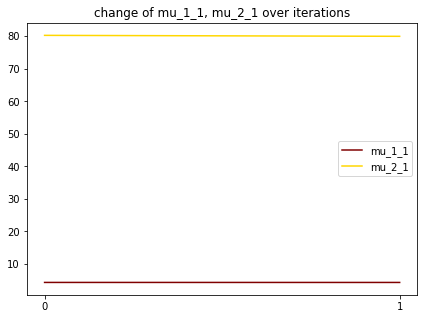

In [748]:
iterations, means = em_gmm(faithful_data_new, init_mean, init_var, init_prior)

iter_list = [i for i in range(iterations+1)]
mean_x_0 = []
mean_y_0 = []
mean_x_1 = []
mean_y_1 = []
for mean in means:
    mean_x_0.append(mean[0][0])
    mean_y_0.append(mean[0][1])
    mean_x_1.append(mean[1][0])
    mean_y_1.append(mean[1][1])

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(mean_x_0, c='maroon', label='mu_1_0')
ax.plot(mean_y_0, c='gold', label='mu_2_0')
plt.xticks(iter_list)
plt.legend()
plt.title('change of mu_1_0, mu_2_0 over iterations')
fig.show()

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(mean_x_1, c='maroon', label='mu_1_1')
ax.plot(mean_y_1, c='gold', label='mu_2_1')
plt.xticks(iter_list)
plt.title('change of mu_1_1, mu_2_1 over iterations')
plt.legend()
fig.show()

In [754]:
print('initial means generated by kmeans:', init_mean[0], init_mean[1])
print('final means generated by em_gmm:', means[-1][0].tolist(), means[-1][1].tolist())

initial means generated by kmeans: [2.0943300000000002, 54.75] [4.29793023255814, 80.28488372093024]
final means generated by em_gmm: [2.038134020618557, 54.49484536082474] [4.291302857142857, 79.98857142857143]
